# Linear Regression

## Normal Equation (Direct Way for calculating the values of '𝝷')

In [8]:
import numpy as np

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3]
])
y = np.array([
    [3],
    [5],
    [8]
])

theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta.round(2))   
# 0.33 ← θ₀ (bias)
# 2.5  ← θ₁ (hours weight)

[[0.33]
 [2.5 ]]


In [9]:
#Calculation for mean square error(mse)
y_pred=X @ theta
errors=y_pred-y

mse=(errors.T @ errors)/len(y)
print(mse)

[[0.05555556]]


In [10]:
np.random.seed(42)
m=100
X=2* np.random.rand(m,1)
noise=np.random.randn(m,1)

y=6 + 5*X+noise


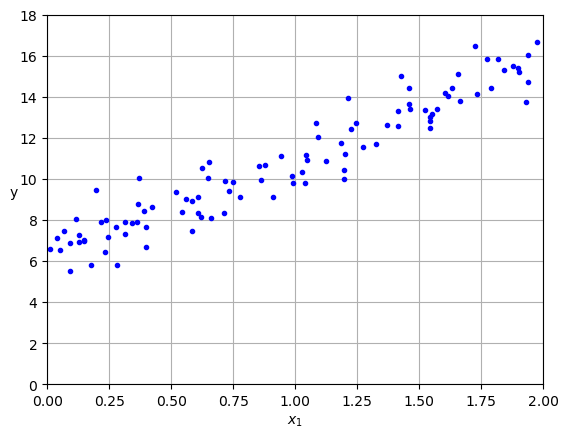

In [11]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,18])
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.grid()
plt.show()

In [12]:
from sklearn.preprocessing import add_dummy_feature
X_bias=add_dummy_feature(X)

theta_best=np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
theta_best

array([[6.21509616],
       [4.77011339]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print(X_new)
print(X_new_b)
print(y_predict)


[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 6.21509616]
 [15.75532293]]


Text(0, 0.5, 'y')

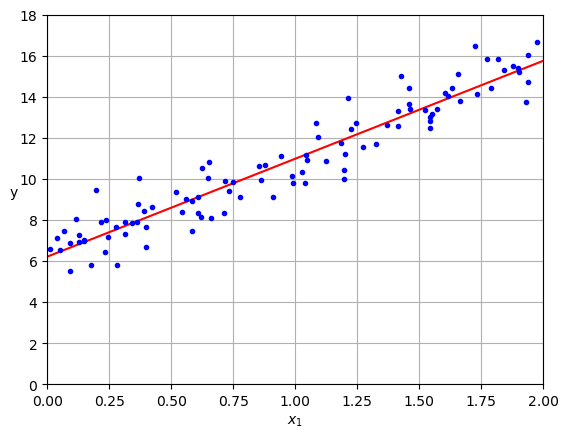

In [14]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0,2,0,18])
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([6.21509616]), array([[4.77011339]]))

In [16]:
lin_reg.predict(X_new)

array([[ 6.21509616],
       [15.75532293]])

In [17]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_bias,y,rcond=1e-6)
theta_best_svd

array([[6.21509616],
       [4.77011339]])

In [18]:
np.linalg.pinv(X_bias)@y

array([[6.21509616],
       [4.77011339]])

# Gradient Descent

In [124]:
eta=0.1   #Learning Rate
n_epoch=1000 # How many iterations over the dataset
m=len(X_bias) #Number of instances

np.random.seed(42)
theta=np.random.randn(2,1)  # parameters are randomly initialized

for epoch in range(n_epoch):
    gradents=2/m * X_bias.T @ (X_bias @ theta-y)
    theta=theta - eta * gradents




In [126]:
theta

array([[6.21509616],
       [4.77011339]])

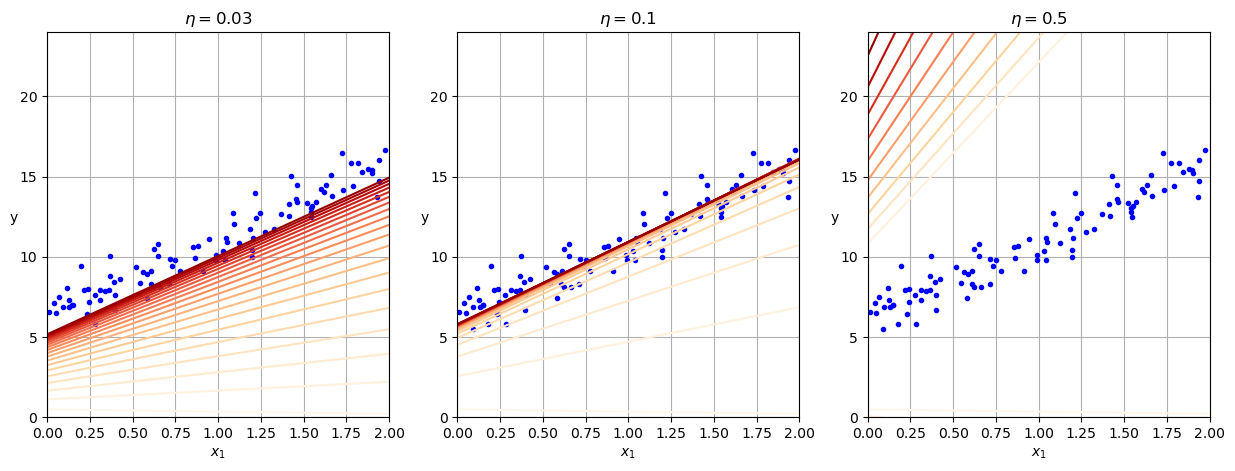

In [166]:
import matplotlib as mpl

def plot_gradient_descent(theta,eta):
    m=len(X_bias)
    n_epoch=1000
    n_shown=20
    plt.plot(X,y,"b.")
    theta_path=[]
    for epoch in range(n_epoch):
        if epoch<n_shown:
            y_predict=X_new_b @ theta
            color=mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown))
            plt.plot(X_new,y_predict,linestyle="solid",color=color)
        gradents=2/m * X_bias.T @ (X_bias @ theta-y)
        theta=theta - eta * gradents
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.ylabel("y",rotation=0)
    plt.axis([0, 2, 0, 24])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta=np.random.randn(2,1)
plt.figure(figsize=(15,5))
plt.subplot(131)
plot_gradient_descent(theta,0.03)
plt.subplot(132)
plot_gradient_descent(theta,0.1)
plt.subplot(133)
plot_gradient_descent(theta,0.5)
plt.show()
        
            
        